<a href="https://colab.research.google.com/github/ManojithBhat/Fed-learning-chem/blob/main/IDPR_Auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyreadr
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_FaultFree = pyreadr.read_r('/content/drive/My Drive/Colab Notebooks/TEP/TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r('/content/drive/My Drive/Colab Notebooks/TEP/TEP_Faulty_Training.RData')['faulty_training']

In [ ]:
DF = pd.concat([df_FaultFree,df_Faulty]) # Join both fault free and faulty dataset
DF.head()

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0          0.0            1.0       1  0.25038   3674.0   4529.0   9.2320   
1          0.0            1.0       2  0.25109   3659.4   4556.6   9.4264   
2          0.0            1.0       3  0.25038   3660.3   4477.8   9.4426   
3          0.0            1.0       4  0.24977   3661.3   4512.1   9.4776   
4          0.0            1.0       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1   26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2   26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3   26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4   26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   

    xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0  42.323  47.757  47.510  41.258  18.447  
1  38.554  43.692  47.427  41.359  17.194  
2  38.990  46.699  47.468  41.199  20.530  
3  38.072  47.541  47.658  41.643  18.089  
4  41.955  47.645  47.346  41.507  18.461  

[5 rows x 55 columns]

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fault_free = DF[DF['faultNumber']==0].iloc[:,3:]

fault_free_scaled = sc.fit_transform(fault_free)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, _, _ = train_test_split(fault_free_scaled, fault_free_scaled, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(200000, 52)

XMEAS_1	A_feed_stream<br>
XMEAS_2	D_feed_stream<br>
XMEAS_3	E_feed_stream<br>
XMEAS_4	Total_fresh_feed_stripper<br>
XMEAS_5	Recycle_flow_into_rxtr<br>
XMEAS_6	Reactor_feed_rate<br>
XMEAS_7	Reactor_pressure<br>
XMEAS_8	Reactor_level<br>
XMEAS_9	Reactor_temp<br>
XMEAS_10	Purge_rate<br>
XMEAS_11	Separator_temp<br>
XMEAS_12	Separator_level<br>
XMEAS_13	Separator_pressure<br>
XMEAS_14	Separator_underflow<br>
XMEAS_15	Stripper_level<br>
XMEAS_16	Stripper_pressure<br>
XMEAS_17	Stripper_underflow<br>
XMEAS_18	Stripper_temperature<br>
XMEAS_19	Stripper_steam_flow<br>
XMEAS_20	Compressor_work<br>
XMEAS_21	Reactor_cooling_water_outlet_temp<br>
XMEAS_22	Condenser_cooling_water_outlet_temp<br>
XMEAS_23	Composition_of_A_rxtr_feed<br>
XMEAS_24	Composition_of_B_rxtr_feed<br>
XMEAS_25	Composition_of_C_rxtr_feed<br>
XMEAS_26	Composition_of_D_rxtr_feed<br>
XMEAS_27	Composition_of_E_rxtr_feed<br>
XMEAS_28	Composition_of_F_rxtr_feed<br>
XMEAS_29	Composition_of_A_purge<br>
XMEAS_30	Composition_of_B_purge<br>
XMEAS_31	Composition_of_C_purge<br>
XMEAS_32	Composition_of_D_purge<br>
XMEAS_33	Composition_of_E_purge<br>
XMEAS_34	Composition_of_F_purge<br>
XMEAS_35	Composition_of_G_purge<br>
XMEAS_36	Composition_of_H_purge<br>
XMEAS_37	Composition_of_D_product<br>
XMEAS_38	Composition_of_E_product<br>
XMEAS_39	Composition_of_F_product<br>
XMEAS_40	Composition_of_G_product<br>
XMEAS_41	Composition_of_H_product<br>
XMV_1	D_feed_flow_valve<br>
XMV_2	E_feed_flow_valve<br>
XMV_3	A_feed_flow_valve<br>
XMV_4	Total_feed_flow_stripper_valve<br>
XMV_5	Compressor_recycle_valve<br>
XMV_6	Purge_valve<br>
XMV_7	Separator_pot_liquid_flow_valve<br>
XMV_8	Stripper_liquid_product_flow_valve<br>
XMV_9	Stripper_steam_valve<br>
XMV_10	Reactor_cooling_water_flow_valve<br>
XMV_11	Condenser_cooling_water_flow_valve<br>


In [ ]:
X_test.shape

(50000, 52)

In [ ]:
!pip install tensorflow
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Define input layer
input_layer = Input(shape=(X_train.shape[1],))

# Define encoder layers
encoded = Dense(32, activation='relu')(input_layer)

# Define decoder layers
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='linear')(decoded)

# Define autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Print model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 52)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 52)             │         1,716 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,468 (17.45 KB)

 Trainable params: 4,468 (17.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1117 - val_loss: 0.1174
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1122 - val_loss: 0.1174
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1116 - val_loss: 0.1170
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1128 - val_loss: 0.1173
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1118 - val_loss: 0.1170
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1129 - val_loss: 0.1170
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1124 - val_loss: 0.1170
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1127 - val_loss: 0.1171
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1131 - val_loss: 0.1175
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1126 - val_loss: 0.1170
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1127 - val_loss: 0.1177
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.

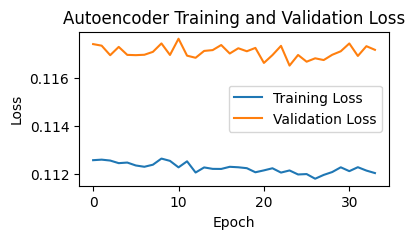

In [ ]:
# Define early stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# Fit autoencoder model with early stopping callback
history = autoencoder.fit(X_train[::50], X_train[::50],
                epochs=300,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test[::50], X_test[::50]),
                callbacks=[early_stopping_callback])

plt.rcParams['figure.figsize'] = [4, 2]
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
temp = DF[(DF['faultNumber']==0) & (DF['simulationRun'] == np.random.randint(1,500) )] #Normal state
# Scale the data to standardize
temp_sc = sc.transform(temp.iloc[:,3:])

temp_pred = autoencoder.predict(temp_sc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


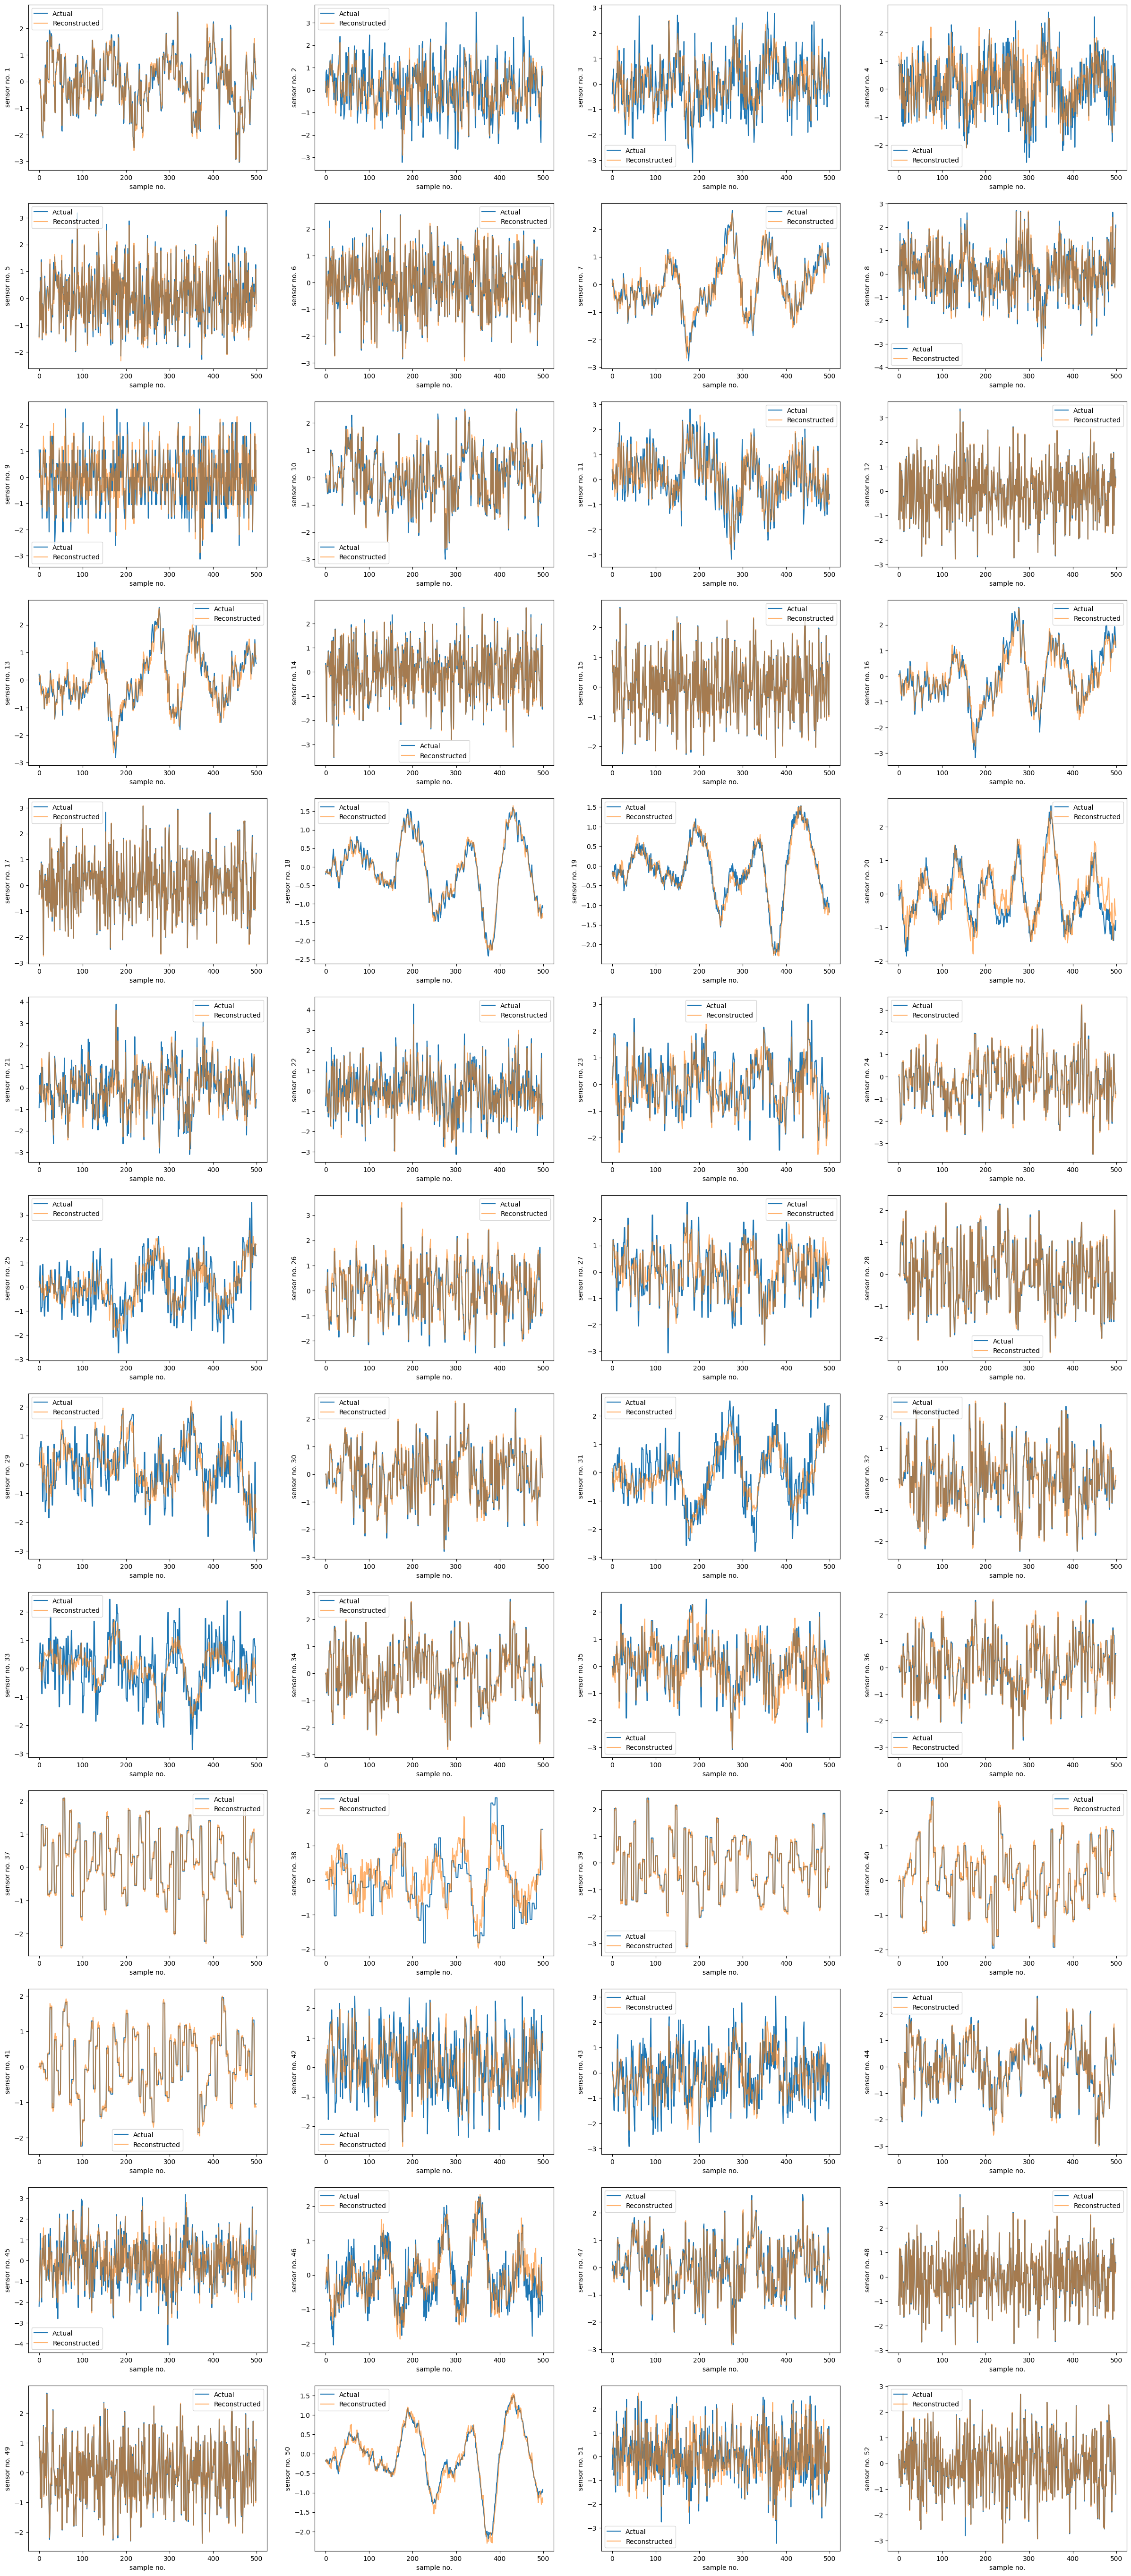

In [ ]:

fig, ax = plt.subplots(13,4,figsize=(30,70))

for i in range (0,temp_pred.shape[1]):  #select all the feature columns to plot
    ax.ravel()[i].plot(temp_sc[:,i],label='Actual')
    ax.ravel()[i].plot(temp_pred[:,i],label='Reconstructed',alpha=0.6)
    ax.ravel()[i].set_xlabel('sample no.')
    ax.ravel()[i].set_ylabel(f'sensor no. {i+1}')
    ax.ravel()[i].legend()

In [ ]:
def recon_loss(NN,X):
    #NN is the trained neural network model
    X_pred = NN.predict(X)
    reconstruction_loss = np.mean((X-X_pred)**2,axis=1)
    return reconstruction_loss

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


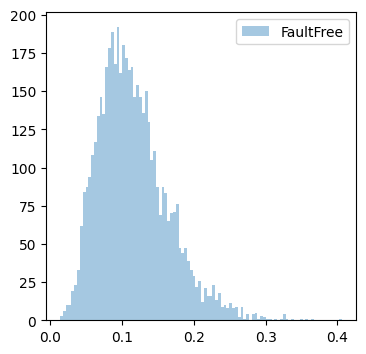

In [ ]:
X_faultFree = sc.transform(DF[DF['faultNumber']==0].iloc[:,3:])

FaultFree_reconstruction_loss=recon_loss(NN=autoencoder,X=X_faultFree[np.random.randint(1,len(X_faultFree),5000)])

plt.rcParams['figure.figsize'] = [4, 4]
plt.hist(FaultFree_reconstruction_loss, bins=100,label='FaultFree',alpha=0.4)
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


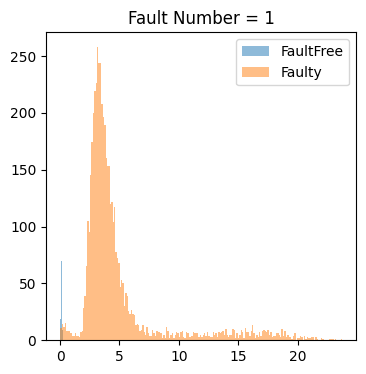

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


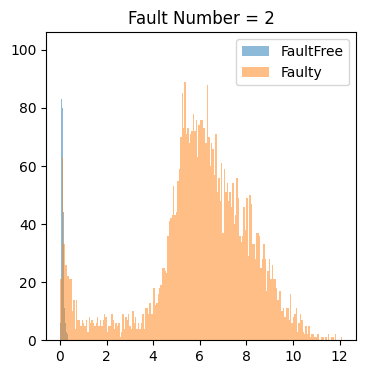

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


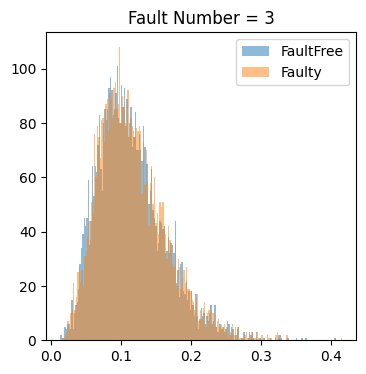

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


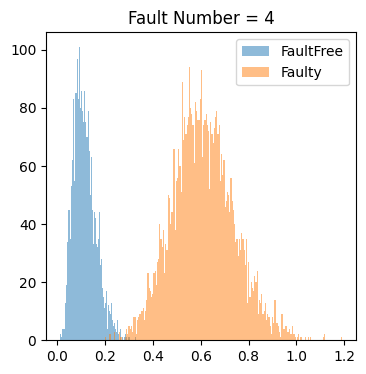

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


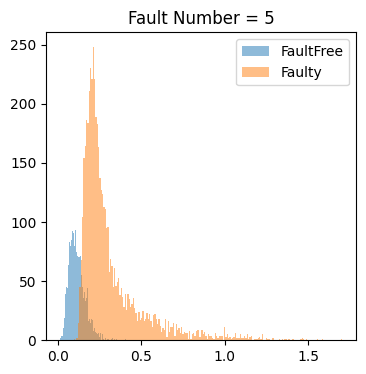

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


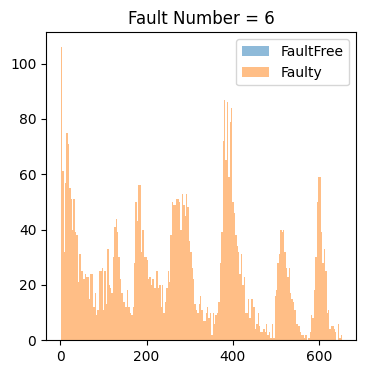

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


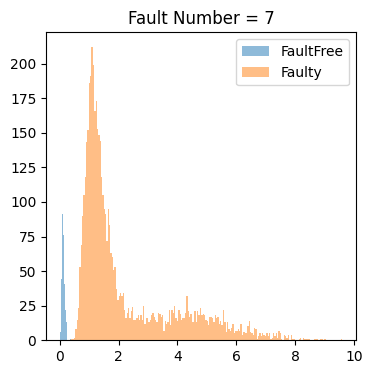

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


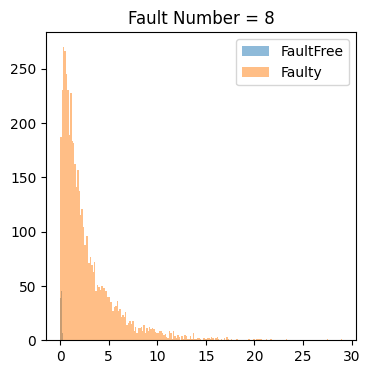

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


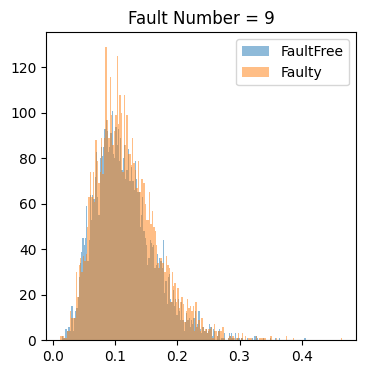

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


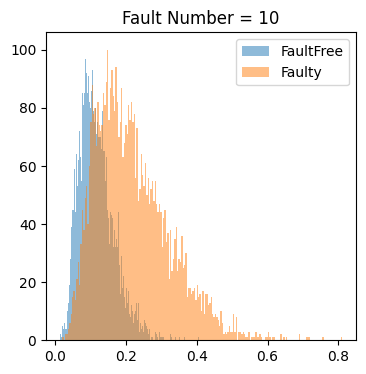

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step


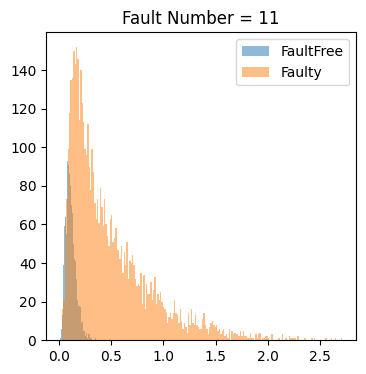

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


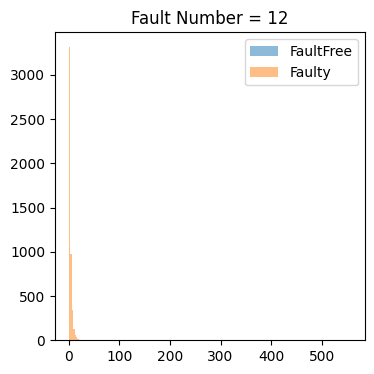

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


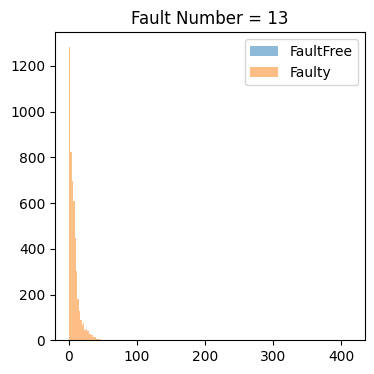

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


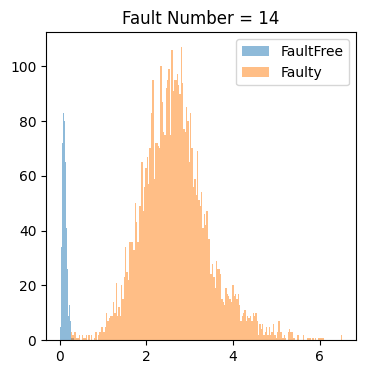

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


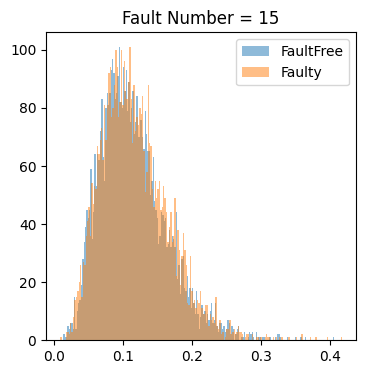

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


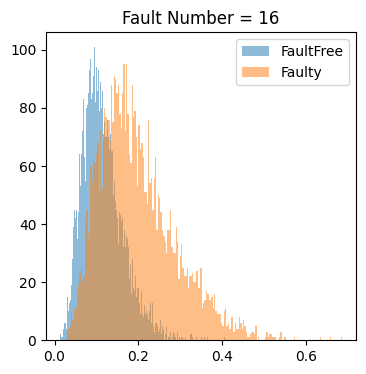

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


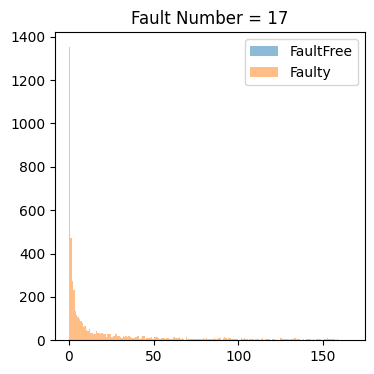

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


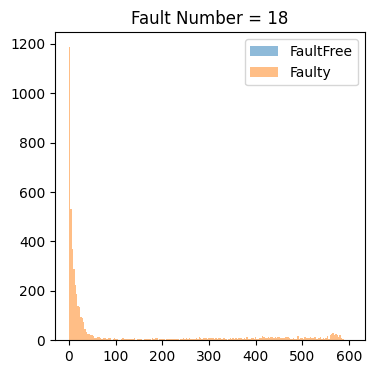

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step


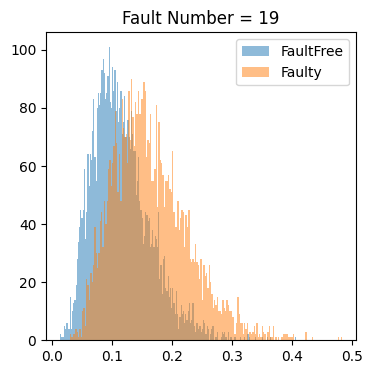

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


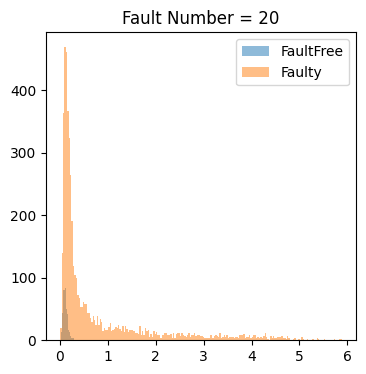

In [ ]:
for F_num in range(1,21):
    temp_faulty=DF[(DF.faultNumber==F_num) & (DF['sample'] > 20.0 )] #DF[(DF.faultNumber==F_num) & (DF.simulationRun==1 )]
    # Scale the data to standardize
    X_faulty = sc.transform(temp_faulty.iloc[:,3:])
    # Recon loss based on Autoencoder
    faulty_reconstruction_loss = recon_loss(NN=autoencoder,X=X_faulty[np.random.randint(1,len(X_faulty),5000)])

    plt.rcParams['figure.figsize'] = [4, 4]
    plt.hist(FaultFree_reconstruction_loss, bins=200,label='FaultFree',alpha=0.5)
    plt.hist(faulty_reconstruction_loss, bins=200,label='Faulty',alpha=0.5)
    plt.title(f'Fault Number = {F_num}')
    plt.legend()
    plt.show()

In [ ]:
mu = np.mean(FaultFree_reconstruction_loss)
std = np.std(FaultFree_reconstruction_loss)

# Obtain threshold from mu and std
threshold = mu+3*std
threshold

In [ ]:

for F_num in range(0,21):
    # store the required fault class and simulation run
    temp = DF[(DF.faultNumber==F_num) & (DF.simulationRun==1 )]  #Faulty Condition
    # Standardization
    X_faulty = sc.transform(temp.iloc[:,3:])
    # Obtain reconstruction loss
    faulty_reconstruction_loss = recon_loss(NN=autoencoder,X=X_faulty)

    plt.rcParams['figure.figsize'] = [8,3]
    plt.plot(faulty_reconstruction_loss,label=f'Fault-{F_num}')
    plt.axhline(threshold,c='k')    #threshold value
    plt.axvline(20,c='g',alpha=0.4) #time of fault introduction
    plt.title(f'Fault Number = {F_num}')
    plt.legend()
    plt.show()



Evaluate F1 score to compare performance

In [ ]:
def combine_result(x,threshold):
    # IF reconstruction loss is grater than threshold THEN its a fault
    result= x > threshold
    result_float = [float(val) for val in result]
    return result_float

In [ ]:
for Fnum in [x for x in range(0,21) if x not in [3,9]]:

    temp_df = DF[ (DF['faultNumber']==Fnum) & (DF['simulationRun']==1) ]
    X_faulty = sc.transform(temp_df.iloc[:,3:])
    faulty_reconstruction_loss = recon_loss(NN=autoencoder,X=X_faulty)

    #populate the true value (y_true) based of Fnum
    y_pred = combine_result(x=faulty_reconstruction_loss,threshold=threshold)


    if Fnum==0:
        y_true = np.repeat(0, len(y_pred))
    else:
        y_true = np.repeat(1, len(y_pred))
        y_true[0:21]=0 # Beacuse the fault was introduced after 20th sample


    # Obtain F1 score
    from sklearn.metrics import f1_score,accuracy_score
    f1 = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    print(f'The F1-Score for Fault_num={Fnum} is {f1}')
    print(f'The Accuracy-Score for Fault_num={Fnum} is {acc}')
    # Plot confusion matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

Get the mean-F1 score of all types of faults from (0-21) for bench marking

In [ ]:
F1_all = [] #initialize the emplty list of F1 score
Acc_all = []
for Fnum in [x for x in range(0,21) if x not in [3,9]]:

    temp_df = DF[ (DF['faultNumber']==Fnum) & (DF['simulationRun']==np.random.randint(1,500))]
    X_faulty = sc.transform(temp_df.iloc[:,3:])
    faulty_reconstruction_loss = recon_loss(NN=autoencoder,X=X_faulty)


    y_pred = combine_result(x=faulty_reconstruction_loss,threshold=threshold)

    if Fnum==0:
        y_true = np.repeat(0, len(y_pred))
    else:
        y_true = np.repeat(1, len(y_pred))
        y_true[0:21]=0 # Beacuse the fault was introduced after 20th sample

    # Obtain F1 score
    from sklearn.metrics import f1_score,accuracy_score
    f1 = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    F1_all.append(f1)
    Acc_all.append(acc)

print(f'The mean F1-Score for Autoencoder-reconstruction method is {np.mean(np.array(F1_all))}')
print(f'The mean Accuracy-Score for Autoencoder-reconstruction method is {np.mean(np.array(Acc_all))}')